## Question 1:
### a)
*   x1 has 5 features
*   x2 has 4 features
### b)

In [2]:
import numpy as np
x1 = np.array([2,3,4,8,9])
x2 = np.array([2,-3,-4,89])
print(f'\nx1:\n\t1-norm: {np.linalg.norm(x1,ord=1)}\n\t2-norm: {np.linalg.norm(x1,ord=2)}\n\tinf-norm: {np.linalg.norm(x1,ord=np.inf)}')
print(f'x2:\n\t1-norm: {np.linalg.norm(x2,ord=1)}\n\t2-norm: {np.linalg.norm(x2,ord=2)}\n\tinf-norm: {np.linalg.norm(x2,ord=np.inf)}')


x1:
	1-norm: 26.0
	2-norm: 13.19090595827292
	inf-norm: 9.0
x2:
	1-norm: 98.0
	2-norm: 89.16277250063504
	inf-norm: 89.0


## Question 2:
### a)
x would have a length of 1028*1028 = 1,056,784
### b)
y would have a length of 64*64 = 4,096
### c)
W has a number of elements equal to the product of the lengths of x and y, which is 1,056,784*4,096 = 4.33e9 elements.
b is the same length as y and therefore has 4,096 elemets

## Question 3:

In [3]:
w = np.array([[1,-1],[2,0]])
print(f'1-norm: {np.linalg.norm(w,ord=1)}\n2-norm: {np.linalg.norm(w,ord=2)}\ninf-norm: {np.linalg.norm(w,ord=np.inf)}\nFrobenius-norm: {np.linalg.norm(w,"fro")}')

1-norm: 3.0
2-norm: 2.2882456112707374
inf-norm: 2.0
Frobenius-norm: 2.449489742783178


## Question 4:

In [4]:
from sklearn import datasets # type: ignore
from sklearn.model_selection import train_test_split # type: ignore
from sklearn import svm # type: ignore
from sklearn.metrics import accuracy_score # type: ignore

iris = datasets.load_iris()

X = iris.data[:,:3]
y = iris.target

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

clf = svm.SVC()
clf.fit(X_train, y_train)

acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

accuracy score : 0.9333333333333333


## Question 5

In [18]:
import tensorflow as tf
from numpy import loadtxt
from keras.models import Sequential # type: ignore
from keras.layers import Dense # type: ignore
from keras import optimizers
from tensorflow.python.keras.optimizers import *
import numpy as np


X = np.linspace(1,100,100)
y = np.array([x**(1/7) for x in X])

model = Sequential()

model.add(Dense(10,input_dim=1,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
predictions = model.predict(X)

#summarize the first 10 cases
for i in range(100):
    print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 10)                20        
                                                                 
 dense_74 (Dense)            (None, 10)                110       
                                                                 
 dense_75 (Dense)            (None, 10)                110       
                                                                 
 dense_76 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 3ms/step
1.0 => 1.01 (expected 1.00)
2.0 => 1.09 (expected 1.10)
3.0 => 1.17 (expected 1.17)
4.0 => 1.22 (expected 1.22)
5.0 => 1.28 (expected 1.

C:\Users\Patrick\AppData\Local\Temp\ipykernel_16008\1733823619.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('%s => %.2f (expected %.2f)' %(X[i].tolist(), predictions[i], y[i]) )


## Question 6:

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                20        
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
 dense_34 (Dense)            (None, 10)                110       
                                                                 
 dense_35 (Dense)            (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 4ms/step


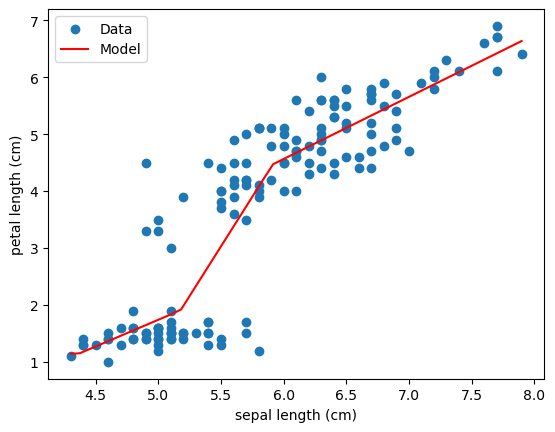

In [10]:
import tensorflow as tf
import numpy as np
from sklearn import datasets # type: ignore
from keras.models import Sequential # type: ignore
from keras.layers import Dense # type: ignore
from keras import optimizers
import matplotlib.pyplot as plt # type: ignore

iris = datasets.load_iris()

X = iris.data[:,0]
y = iris.data[:,2]

model = Sequential()

model.add(Dense(10,input_dim=1,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

#compile the keras model
opt = optimizers.Adam(learning_rate=0.001)
mse = tf.keras.losses.MeanSquaredError(
    reduction=tf.keras.losses.Reduction.SUM)
model.compile(loss=mse, optimizer=opt)



#fit the keras model on the dataset (CPU)
model.fit(X,y,epochs=2000,batch_size=10, verbose=0)
model.summary()

#make class predictions with the model
X_test = np.linspace(min(X),max(X))
predictions = model.predict(X_test)

plt.scatter(X,y, label="Data")
plt.plot(X_test,predictions,'r-', label="Model")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.legend()